In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#defino el frame dataEvents con el frame dado por el finger
dataEvents = pd.read_csv("events.csv") 

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Análisis sobre los modelos de los productos disponibles según los tipos de eventos.

Veo cuáles son los modelos más populares para el evento 'checkout'. Empiezo agrupando los datos según el tipo de evento para quedarme con el grupo de checkouts y luego relizo un conteo de los modelos para los que hubo checkouts.

In [33]:
events = dataEvents.groupby('event')
checkouts =events.get_group('checkout')
checkoutModel = checkouts['model'].value_counts().head(15)

Text(0,0.5,'Modelo')

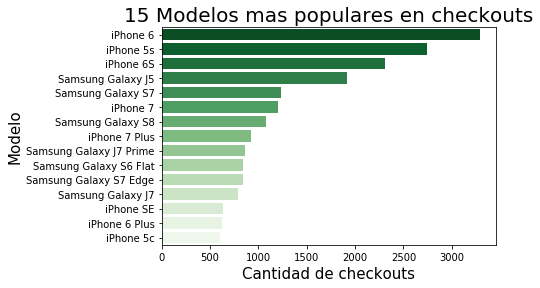

In [34]:
g = sns.barplot(x=checkoutModel.values, y=checkoutModel.index, orient='h', palette = 'Greens_r')
g.set_title("15 Modelos mas populares en checkouts", fontsize=20)
g.set_xlabel("Cantidad de checkouts", fontsize=15)
g.set_ylabel("Modelo", fontsize=15)

También puede resultar interesante analizar cuáles son los modelos más populares para los que hubo conversiones. 

In [35]:
conversiones = events.get_group('conversion')
conversionModel = conversiones['model'].value_counts().head(15)

Text(0,0.5,'Modelo')

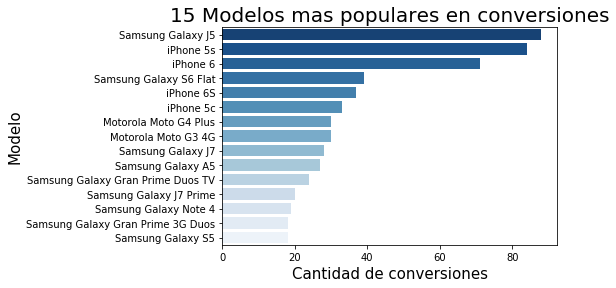

In [36]:
conversionModel = conversiones['model'].value_counts().head(15)
conversionGraph = sns.barplot(x=conversionModel.values, y=conversionModel.index, orient='h', palette = 'Blues_r')
conversionGraph.set_title("15 Modelos mas populares en conversiones", fontsize=20)
conversionGraph.set_xlabel("Cantidad de conversiones", fontsize=15)
conversionGraph.set_ylabel("Modelo", fontsize=15)

Un dato interesante que se puede observar es que el modelo con más checkouts no coincide con el modelo que tiene más conversiones.

Podemos ver tambien cuáles son los modelos con más 'leads'.

Text(0,0.5,'Cantidad de leads')

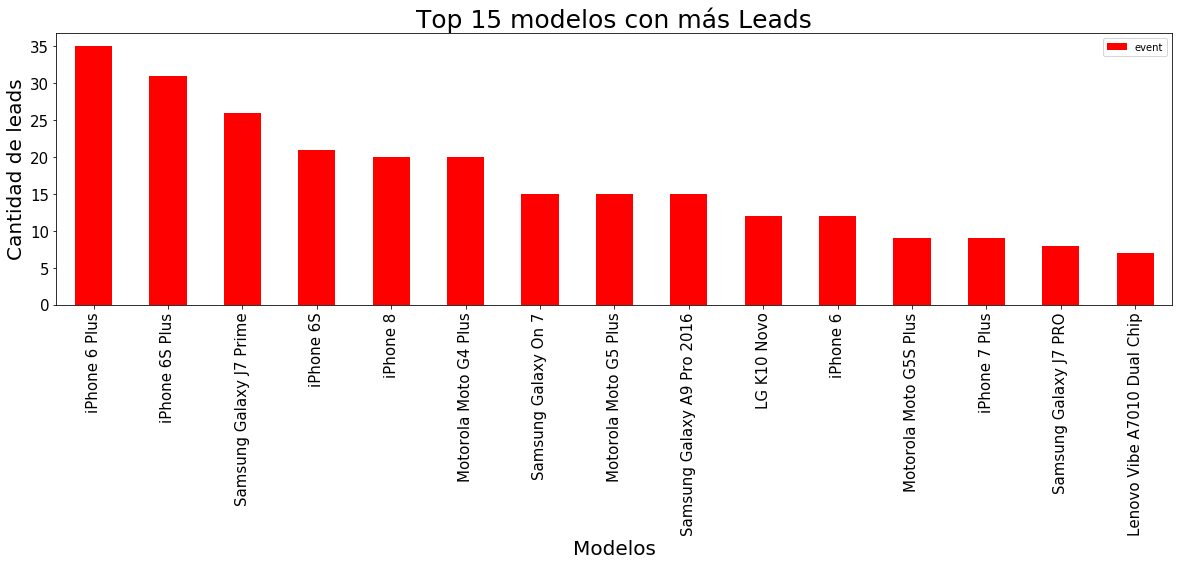

In [44]:
leads_por_model = dataEvents.loc[:, ['event', 'model']].groupby('event').get_group('lead').groupby('model').count().sort_values('event', ascending = False)
leadsGraph = leads_por_model.head(15).plot(kind = 'bar', figsize = (20,5), color = 'red', fontsize = '15')
leadsGraph.set_title('Top 15 modelos con más Leads', fontsize = 25)
leadsGraph.set_xlabel('Modelos', fontsize = 20)
leadsGraph.set_ylabel('Cantidad de leads', fontsize = 20)

Celulares vistos ¿se cumple el Principio de Pareto?

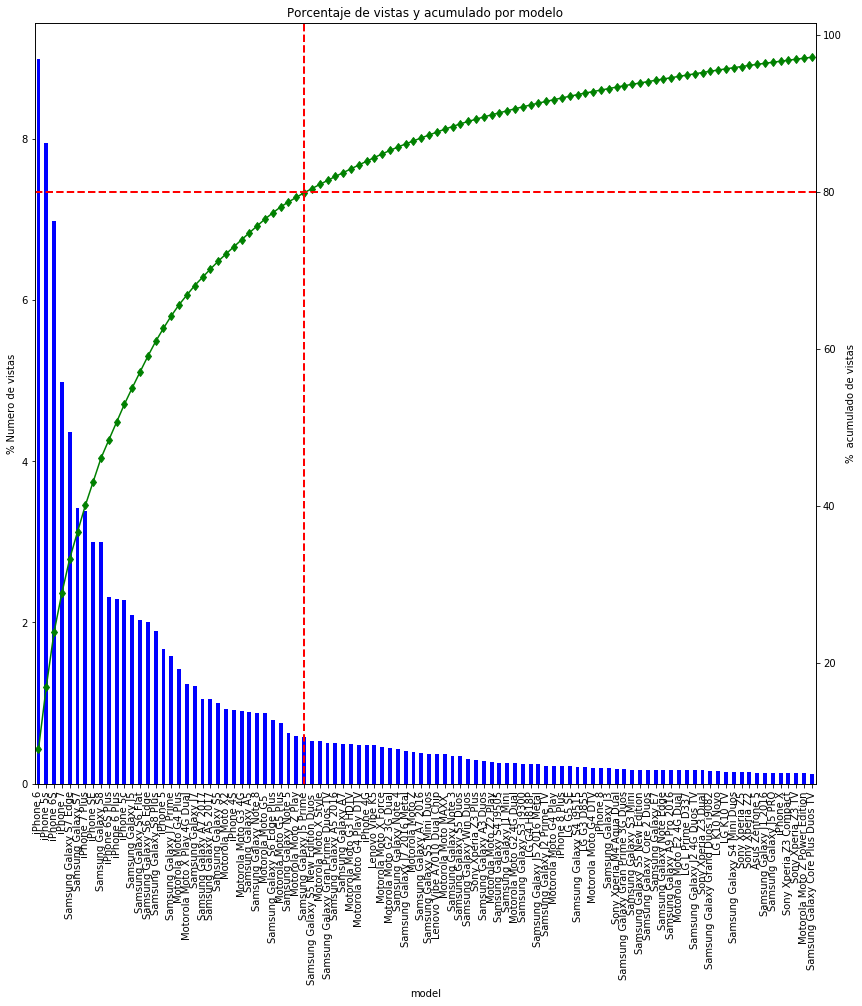

In [10]:
viewed_df=dataEvents[dataEvents['event'].str.contains("viewed product")]
grupo = viewed_df.groupby('model')['model'].agg({'count'})
grupo=grupo.sort_values(ascending=False,by="count")
grupo_modelos_populares=grupo.reset_index()

total=grupo_modelos_populares['count'].sum()
Total_num_modelos=grupo_modelos_populares['model'].count()
grupo_modelos_populares['porcentaje']=grupo_modelos_populares['count'].apply(lambda x: x/total*100)
grupo_modelos_populares['porcentaje acumulado']=grupo_modelos_populares['porcentaje'].cumsum()
grupo_modelos_populares['peso']=grupo_modelos_populares['model'].apply(lambda x: 1/Total_num_modelos*100)
grupo_modelos_populares['peso cumulado ']=grupo_modelos_populares['peso'].cumsum()
grupo_modelos_populares=grupo_modelos_populares.head(100)
h=grupo_modelos_populares.plot(kind='bar',rot=90, x= 'model',y= 'porcentaje',legend=False,figsize=(14,14),color='b',title="Porcentaje de vistas y acumulado por modelo")
h.set_ylabel("% Numero de vistas",fontsize=10)
h=grupo_modelos_populares['porcentaje acumulado'].plot(kind='line',rot=90,x= 'model',color='g', marker='d', secondary_y=True)
h.set_ylabel("%  acumulado de vistas")
h.set_xlabel("Modelo celular")
h.axhline(y=80,color='r', linestyle='--', lw=2)
h.axvline(x=34,color='r', linestyle='--', lw=2)
h

Los 33 los modelos de celulares mas vistos (17 % del total) representa el 80% ciento de las vistas

celulares comprados ¿se cumple el Principio de Pareto?

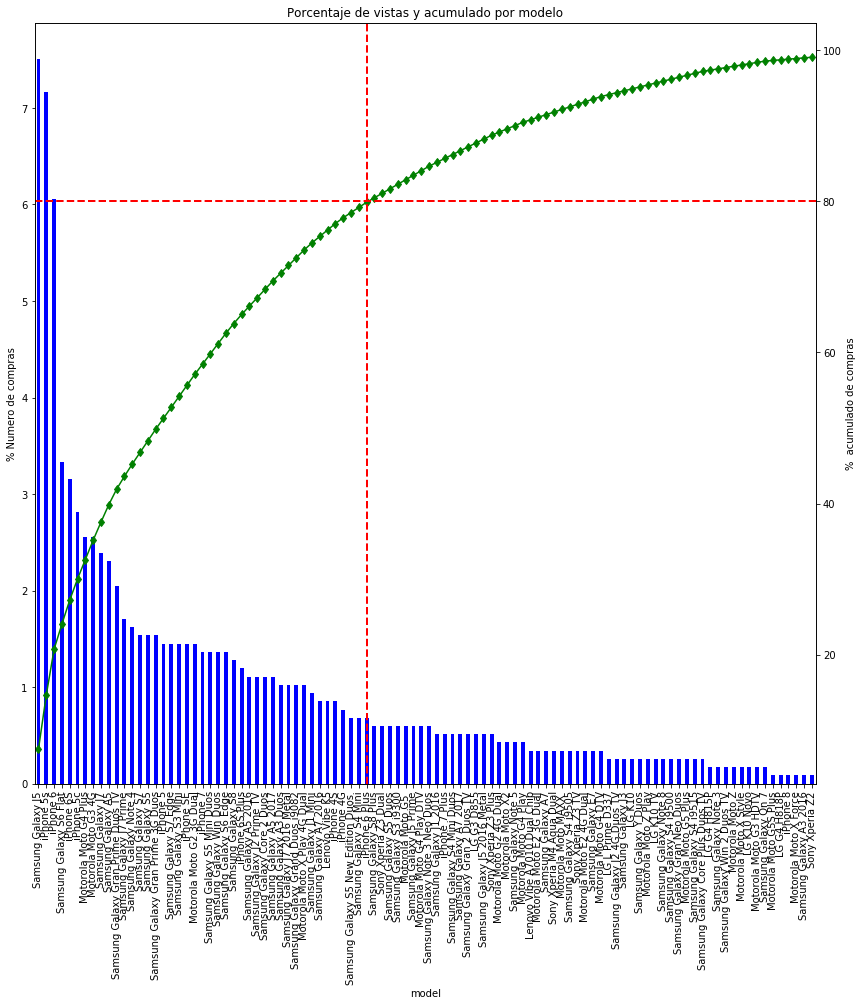

In [11]:
conversion_df=dataEvents[dataEvents['event'].str.contains("conversion")]
grupo_compras= conversion_df.groupby('model')['model'].agg({'count'})
grupo_compras=grupo_compras.sort_values(ascending=False,by="count")
grupo_compras2=grupo_compras.reset_index()
total_compras=grupo_compras2['count'].sum()
grupo_compras2['porcentaje']=grupo_compras2['count'].apply(lambda x: x/total_compras*100)
grupo_compras2['porcentaje acumulado']=grupo_compras2['porcentaje'].cumsum()
grupo_compras2['peso']=grupo_compras2['model'].apply(lambda x: 1/Total_num_modelos*100)
grupo_compras2['peso cumulado ']=grupo_compras2['peso'].cumsum()
grupo_compras2=grupo_compras2.head(100)
e=grupo_compras2.plot(kind='bar',rot=90, x= 'model',y= 'porcentaje',legend=False,figsize=(14,14),color='b',title="Porcentaje de vistas y acumulado por modelo")
e.set_ylabel("% Numero de compras",fontsize=10)
e=grupo_compras2['porcentaje acumulado'].plot(kind='line',rot=90,x= 'model',color='g', marker='d', secondary_y=True)
e.set_ylabel("%  acumulado de compras")
e.set_xlabel("Modelo celular")
e.axhline(y=80,color='r', linestyle='--', lw=2)
e.axvline(x=42,color='r', linestyle='--', lw=2)
e

Los 42 los modelos de celulares mas comprados (21 % del total) representa el 80% ciento de las compras 

Quiero ver cuál es el evento más común para cada modelo, por ende saco los 'event' y 'model' vacíos

In [4]:
dataEvents.dropna(subset = ['event'], inplace = True)
dataEvents.dropna(subset = ['model'], inplace = True)
modelGrouped = dataEvents.groupby(['model', 'event'])
modelData = pd.DataFrame(modelGrouped.size().reset_index('event'))
modelData.rename(columns = {0 : 'cantidad por evento'}, inplace = True )

Se entiende que todos los productos van a ser vistos antes de hacer nada, por lo que el hecho de que 'viewed product' sea el evento más común no dice nada interesante.
Por otra parte puedo analizar cuál es el producto que más eventos, distintos a viewed product, tiene frente a la cantidad de eventos viewed product de ese mismo producto, para analizar la confiabilidad que presenta el producto en cuestión

Convierto a 'model' en el índice del data frame, para visualizar mejor qué eventos y qué cantidad de veces que ocurrió el evento tengo por cada modelo

In [5]:
modelosOrdenados = dataEvents['model'].value_counts().index.tolist()
modelList = dataEvents[dataEvents['model'].isin(modelosOrdenados)].groupby(['model','event']).size()
modelList = modelList.to_frame()
modelList.head(10)

0
model                     event              
Asus Live                 viewed product    4
Asus Zenfone 2            checkout          4
                          viewed product  138
Asus Zenfone 2 Deluxe     checkout          2
                          viewed product  201
Asus Zenfone 2 Laser      viewed product   12
Asus Zenfone 3 Max  32 GB checkout          8
                          viewed product  124
Asus Zenfone 3 Max 16 GB  checkout         29
                          conversion        1

Ahora pivoteo el data frame para que cada evento sea una tabla y la cantidad de veces que ocurrió sea el valor de la celda.

In [6]:
modelListPivoted = modelList.pivot_table(index = ["model"], columns = "event", values = 0, aggfunc = 'first')
modelListPivoted = modelListPivoted[['viewed product', 'lead', 'conversion', 'checkout']]
modelListPivoted.sort_values(by='viewed product', ascending = False)

event,viewed product,lead,conversion,checkout
model,,,,
iPhone 6,47538.0,12.0,71.0,3295.0
iPhone 5s,42045.0,5.0,84.0,2744.0
iPhone 6S,36930.0,21.0,37.0,2308.0
iPhone 7,26330.0,5.0,16.0,1205.0
Samsung Galaxy S7 Edge,23062.0,4.0,17.0,843.0
Samsung Galaxy S7,18085.0,NaN,18.0,1234.0
iPhone 7 Plus,17853.0,9.0,6.0,924.0
iPhone SE,15874.0,5.0,17.0,635.0
Samsung Galaxy S8,15868.0,2.0,15.0,1074.0


Para hacer la comparación de checkouts, leads o conversion por modelo frente a las vistas que tuvo el mismo, creo data frames por separado que contengan solamente la información que necesito en cada caso.
Empiezo con los checkouts

In [288]:
modelCheckoutToViews = modelListPivoted[['viewed product', 'checkout']]
modelLeadToViews = modelListPivoted[['viewed product', 'lead']]
modelConvertionToViews = modelListPivoted[['viewed product', 'conversion']]
modelCheckoutToViews.head(9)

event,viewed product,checkout
model,,
Asus Live,4.0,NaN
Asus Zenfone 2,138.0,4.0
Asus Zenfone 2 Deluxe,201.0,2.0
Asus Zenfone 2 Laser,12.0,NaN
Asus Zenfone 3 Max 32 GB,124.0,8.0
Asus Zenfone 3 Max 16 GB,141.0,29.0
Asus Zenfone 3 Zoom,42.0,2.0
Asus Zenfone 5,720.0,8.0
Asus Zenfone 6,583.0,7.0


Tratamos de analizar la relación de checkouts frente a la cantidad de vistas de cada modelo, para ver si hay más tendencia a comprar un modelo que otro.

Se ordena del Data Frame de forma descendente por cantidad de vistas para tener una visualización más clara en cuanto a la relación entre cehckout y vista.

Para visualizar tanto el modelo como la cantidad de vistas del mismo, agregamos viewed producto como índice

In [278]:
modelCheckoutToViewsOrderedByViews = modelCheckoutToViews.sort_values(by = 'viewed product', ascending = False)
modelCheckoutToViewsOrderedByViews = modelCheckoutToViewsOrderedByViews.set_index(['viewed product'], append= True)
modelCheckoutToViewsOrderedByViews

,event,checkout
model,viewed product,
iPhone 6,47538.0,3295.0
iPhone 5s,42045.0,2744.0
iPhone 6S,36930.0,2308.0
iPhone 7,26330.0,1205.0
Samsung Galaxy S7 Edge,23062.0,843.0
Samsung Galaxy S7,18085.0,1234.0
iPhone 7 Plus,17853.0,924.0
iPhone SE,15874.0,635.0
Samsung Galaxy S8,15868.0,1074.0


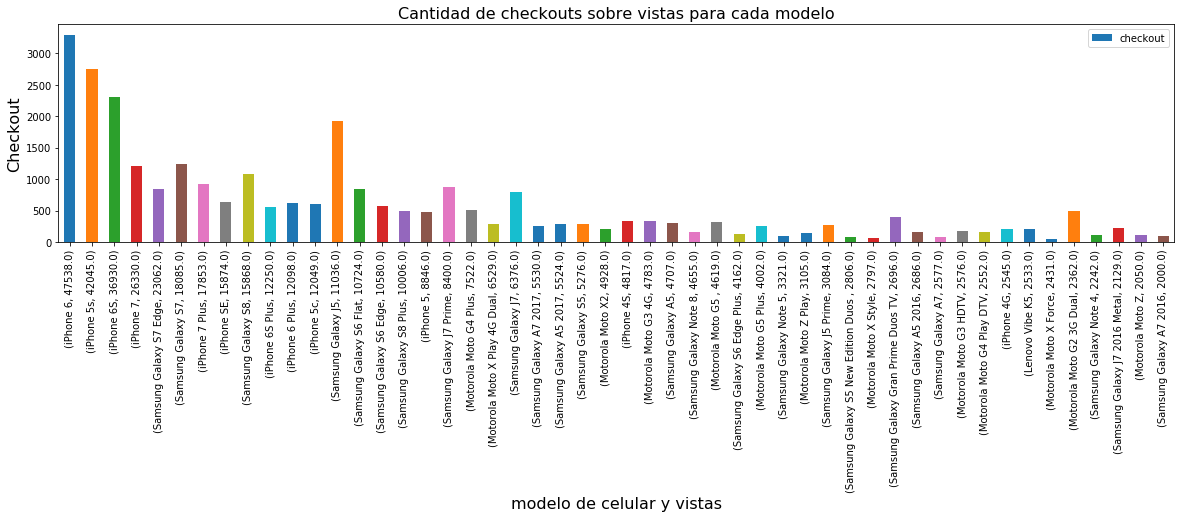

In [275]:
vistasQueMasHicieronCheckoutPlot = modelCheckoutToViewsRatioOrderedByViews.head(50).plot(kind = 'bar', y = 0, figsize = (20,4))
vistasQueMasHicieronCheckoutPlot.set_xlabel("modelo de celular y vistas", fontsize = 16)
vistasQueMasHicieronCheckoutPlot.set_ylabel("Checkout", fontsize = 16)
vistasQueMasHicieronCheckoutPlot.set_title("Cantidad de checkouts sobre vistas para cada modelo",fontsize = 16)
plt.show()

Se observa que el iPhone 6 es el modelo con más vistas y con más checkouts como es de esperar, sin embargo el Samsung Galaxy J5 tiene muchas menos vistas que el iPhone 7 y el iPhone 6S, y sin embargo tiene más cantidad de checkout que el primero y casi tantas como el segundo

Ahora busco el mismo tipo de análisis con el evento 'lead' que es cuando una persona se registra para recibir aviso de disponibilidad de stock para el modelo.

In [281]:
modelLeadToViewsOrderedByViews = modelLeadToViews.sort_values(by = 'viewed product', ascending = False)
modelLeadToViewsOrderedByViews = modelLeadToViewsOrderedByViews.set_index(['viewed product'], append= True)
modelLeadToViewsOrderedByViews.head(20)

,event,lead
model,viewed product,
iPhone 6,47538.0,12.0
iPhone 5s,42045.0,5.0
iPhone 6S,36930.0,21.0
iPhone 7,26330.0,5.0
Samsung Galaxy S7 Edge,23062.0,4.0
Samsung Galaxy S7,18085.0,NaN
iPhone 7 Plus,17853.0,9.0
iPhone SE,15874.0,5.0
Samsung Galaxy S8,15868.0,2.0


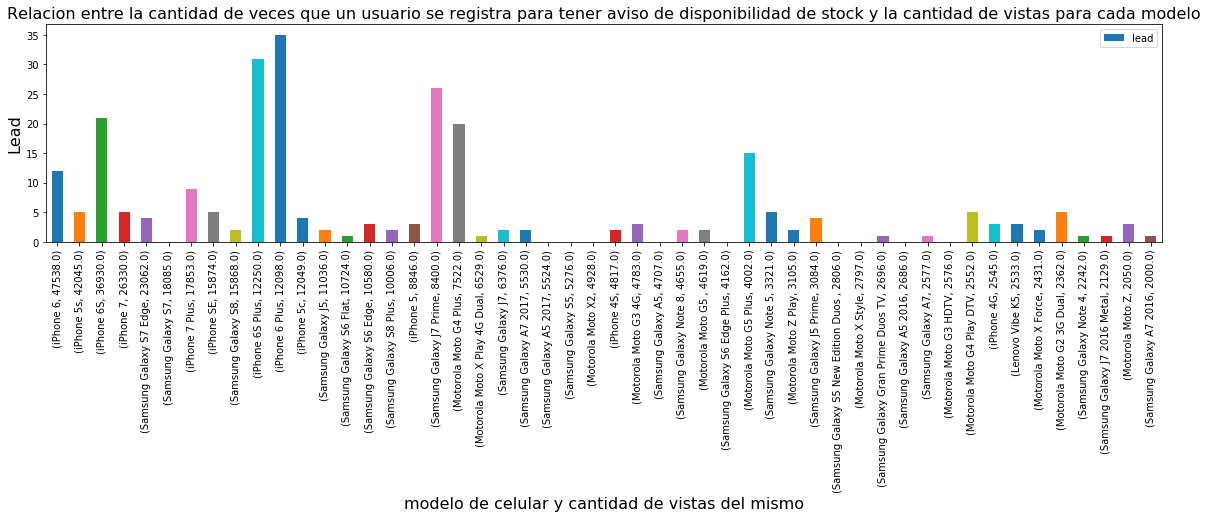

In [284]:
vistasQueMasHicieronLeadPlot = modelLeadToViewsOrderedByViews.head(50).plot(kind = 'bar', y = 'lead', figsize = (20,4))
vistasQueMasHicieronLeadPlot.set_xlabel("modelo de celular y cantidad de vistas del mismo", fontsize = 16)
vistasQueMasHicieronLeadPlot.set_ylabel("Lead", fontsize = 16)
vistasQueMasHicieronLeadPlot.set_title("Relacion entre la cantidad de veces que un usuario se registra para tener aviso de disponibilidad de stock y la cantidad de vistas para cada modelo",fontsize = 16)
plt.show()

Ahora se procede a hacer el mismo análisis con el evento 'convertion' que es cuando el modelo es efectivamente comprado

In [290]:
modelConvertionToViewsOrderedByViews = modelConvertionToViews.sort_values(by = 'viewed product', ascending = False)
modelConvertionToViewsOrderedByViews = modelConvertionToViewsOrderedByViews.set_index(['viewed product'], append= True)
modelConvertionToViewsOrderedByViews

,event,conversion
model,viewed product,
iPhone 6,47538.0,71.0
iPhone 5s,42045.0,84.0
iPhone 6S,36930.0,37.0
iPhone 7,26330.0,16.0
Samsung Galaxy S7 Edge,23062.0,17.0
Samsung Galaxy S7,18085.0,18.0
iPhone 7 Plus,17853.0,6.0
iPhone SE,15874.0,17.0
Samsung Galaxy S8,15868.0,15.0


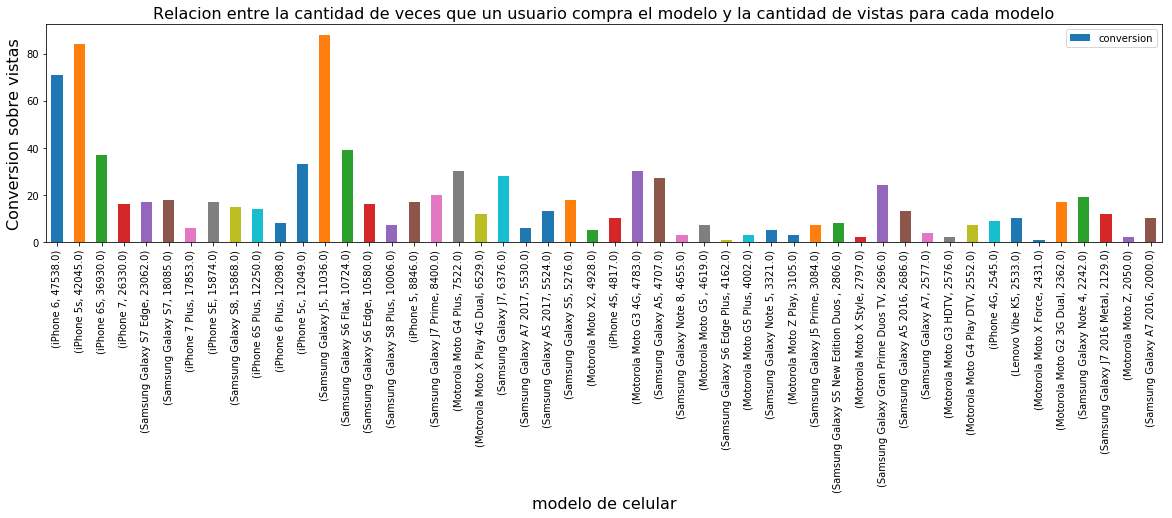

In [291]:
vistasQueMasHicieronConversionPlot = modelConvertionToViewsOrderedByViews.head(50).plot(kind = 'bar', y = 'conversion', figsize = (20,4))
vistasQueMasHicieronConversionPlot.set_xlabel("modelo de celular", fontsize = 16)
vistasQueMasHicieronConversionPlot.set_ylabel("Conversion sobre vistas", fontsize = 16)
vistasQueMasHicieronConversionPlot.set_title("Relacion entre la cantidad de veces que un usuario compra el modelo y la cantidad de vistas para cada modelo",fontsize = 16)
plt.show()

In [292]:
modelConvertionToCheckouts = modelListPivoted[['checkout', 'conversion']]
modelConvertionToCheckouts.dropna(subset = ['checkout'], inplace = True)
modelConvertionToCheckouts

/home/federico/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


event,checkout,conversion
model,,
Asus Zenfone 2,4.0,NaN
Asus Zenfone 2 Deluxe,2.0,NaN
Asus Zenfone 3 Max 32 GB,8.0,NaN
Asus Zenfone 3 Max 16 GB,29.0,1.0
Asus Zenfone 3 Zoom,2.0,NaN
Asus Zenfone 5,8.0,1.0
Asus Zenfone 6,7.0,NaN
Asus Zenfone Go,3.0,NaN
LG X Screen,9.0,NaN


Ahora indezamos por modelo y por checkout para poder visualizarlo en el plot

In [298]:
modelConvertionToCheckoutOrderedByCheckout = modelConvertionToCheckouts.sort_values(by = 'checkout', ascending = False)
modelConvertionToCheckoutOrderedByCheckout = modelConvertionToCheckoutOrderedByCheckout.set_index(['checkout'], append= True)

modelConvertionToCheckoutOrderedByCheckout

,event,conversion
model,checkout,
iPhone 6,3295.0,71.0
iPhone 5s,2744.0,84.0
iPhone 6S,2308.0,37.0
Samsung Galaxy J5,1918.0,88.0
Samsung Galaxy S7,1234.0,18.0
iPhone 7,1205.0,16.0
Samsung Galaxy S8,1074.0,15.0
iPhone 7 Plus,924.0,6.0
Samsung Galaxy J7 Prime,866.0,20.0


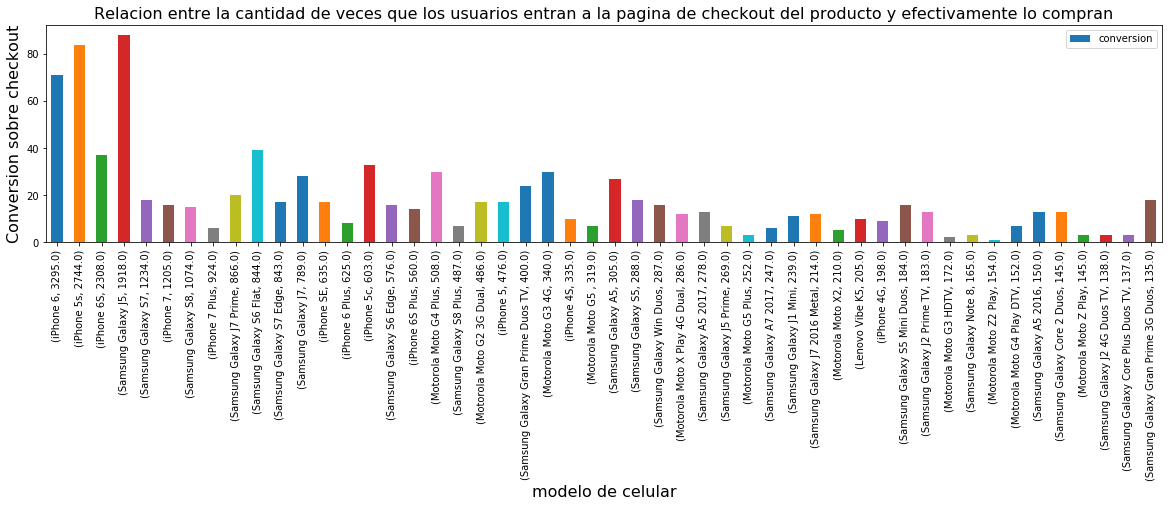

In [299]:
checkoutsQueMasHicieronConversionPlot = modelConvertionToCheckoutOrderedByCheckout.head(50).plot(kind = 'bar', y = 'conversion', figsize = (20,4))
checkoutsQueMasHicieronConversionPlot.set_xlabel("modelo de celular", fontsize = 16)
checkoutsQueMasHicieronConversionPlot.set_ylabel("Conversion sobre checkout", fontsize = 16)
checkoutsQueMasHicieronConversionPlot.set_title("Relacion entre la cantidad de veces que los usuarios entran a la pagina de checkout del producto y efectivamente lo compran",fontsize = 16)
plt.show()